# Week 3 goals

1. Regression graph for anxiety, stress, and depression according to different demographics. (coefficients, and linear/non-linear regression among 3 components in DASS).

2. Regression b/t **Demographics** and depression stress (e.g. years of education received vs. depression/stress/anxiety)

3. Regression b/t **Personality** and DASS

4. Feature Engineering.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('data.csv',sep='\t')

In [3]:
data.head()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,4,28,3890,4,25,2122,2,16,1944,4,...,1,1,1,12,1,10,2,1,2,NaN
1,4,2,8118,1,36,2890,2,35,4777,3,...,2,1,2,7,0,70,2,1,4,NaN
2,3,7,5784,1,33,4373,4,41,3242,1,...,2,1,1,4,3,60,1,1,3,NaN
3,2,23,5081,3,11,6837,2,37,5521,1,...,2,1,2,4,5,70,2,1,5,biology
4,2,36,3215,2,13,7731,3,5,4156,4,...,2,2,3,10,1,10,2,1,4,Psychology


## DASS Score

In [4]:
data['stress_score'] = data.apply(lambda row: row.Q1A + row.Q6A + row.Q8A + row.Q11A + row.Q12A + row.Q14A
                                       + row.Q18A + row.Q22A + row.Q27A + row.Q29A + row.Q32A + row.Q33A + row.Q35A + row.Q39A,
                                       axis=1)

In [5]:
data['stress_category'] = data["stress_score"]
data.loc[ data['stress_category'] <= 28, 'stress_category'] = 1
data.loc[(data['stress_category'] > 28) & (data['stress_category'] <= 32), 'stress_category'] = 2
data.loc[(data['stress_category'] > 32) & (data['stress_category'] <= 39), 'stress_category'] = 3
data.loc[(data['stress_category'] > 39) & (data['stress_category'] <= 47), 'stress_category'] = 4
data.loc[ data['stress_category'] > 47, 'stress_category'] = 5 

In [6]:
data['anxiety_score'] = data.apply(lambda row: row.Q2A + row.Q4A + row.Q7A + row.Q9A + row.Q15A + row.Q19A
                                       + row.Q20A + row.Q23A + row.Q25A + row.Q28A + row.Q30A + row.Q36A + row.Q40A + row.Q41A,
                                       axis=1)

In [7]:
data['anxiety_category'] = data['anxiety_score']
data.loc[ data['anxiety_category'] <= 21, 'anxiety_category'] = 1
data.loc[(data['anxiety_category'] > 21) & (data['anxiety_category'] <= 23), 'anxiety_category'] = 2
data.loc[(data['anxiety_category'] > 23) & (data['anxiety_category'] <= 28), 'anxiety_category'] = 3
data.loc[(data['anxiety_category'] > 28) & (data['anxiety_category'] <= 33), 'anxiety_category'] = 4
data.loc[ data['anxiety_category'] > 33, 'anxiety_category'] = 5 

In [8]:
data['depression_score'] = data.apply(lambda row: row.Q3A + row.Q5A + row.Q10A + row.Q13A + row.Q16A + row.Q17A
                                       + row.Q21A + row.Q24A + row.Q26A + row.Q31A + row.Q34A + row.Q37A + row.Q38A + row.Q42A,
                                       axis=1)

In [9]:
data['depression_category'] = data['depression_score']
data.loc[ data['depression_category'] <= 23, 'depression_category'] = 1
data.loc[(data['depression_category'] > 23) & (data['depression_category'] <= 27), 'depression_category'] = 2
data.loc[(data['depression_category'] > 27) & (data['depression_category'] <= 34), 'depression_category'] = 3
data.loc[(data['depression_category'] > 34) & (data['depression_category'] <= 41), 'depression_category'] = 4
data.loc[ data['depression_category'] > 41, 'depression_category'] = 5 

In [10]:
data.head()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,voted,married,familysize,major,stress_score,stress_category,anxiety_score,anxiety_category,depression_score,depression_category
0,4,28,3890,4,25,2122,2,16,1944,4,...,2,1,2,NaN,54,5,48,5,41,4
1,4,2,8118,1,36,2890,2,35,4777,3,...,2,1,4,NaN,41,4,31,4,38,4
2,3,7,5784,1,33,4373,4,41,3242,1,...,1,1,3,NaN,31,2,26,3,53,5
3,2,23,5081,3,11,6837,2,37,5521,1,...,2,1,5,biology,30,2,31,4,30,3
4,2,36,3215,2,13,7731,3,5,4156,4,...,2,1,4,Psychology,43,4,54,5,46,5


## TIPI -> Five Personality Scale

In [11]:
data['Extroversion'] = data.apply(lambda row: row.TIPI1 + (7-row.TIPI6), axis=1)

In [12]:
data['Agreeableness'] = data.apply(lambda row: row.TIPI7 + (7-row.TIPI2), axis=1)

In [13]:
data['Conscientiousness'] = data.apply(lambda row: row.TIPI3 + (7-row.TIPI8), axis=1)

In [14]:
data['Emotional_stability'] = data.apply(lambda row: row.TIPI9 + (7-row.TIPI4), axis=1)

In [15]:
data['Openness_to_experience'] = data.apply(lambda row: row.TIPI5 + (7-row.TIPI10), axis=1)

In [16]:
data.head()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,stress_category,anxiety_score,anxiety_category,depression_score,depression_category,Extroversion,Agreeableness,Conscientiousness,Emotional_stability,Openness_to_experience
0,4,28,3890,4,25,2122,2,16,1944,4,...,5,48,5,41,4,1,9,9,1,13
1,4,2,8118,1,36,2890,2,35,4777,3,...,4,31,4,38,4,9,9,4,1,7
2,3,7,5784,1,33,4373,4,41,3242,1,...,2,26,3,53,5,3,7,4,8,10
3,2,23,5081,3,11,6837,2,37,5521,1,...,2,31,4,30,3,4,12,13,9,12
4,2,36,3215,2,13,7731,3,5,4156,4,...,4,54,5,46,5,4,7,4,4,9


## 1. Feature Engineering.

In [17]:
data.isnull().sum()

Q1A                           0
Q1I                           0
Q1E                           0
Q2A                           0
Q2I                           0
Q2E                           0
Q3A                           0
Q3I                           0
Q3E                           0
Q4A                           0
Q4I                           0
Q4E                           0
Q5A                           0
Q5I                           0
Q5E                           0
Q6A                           0
Q6I                           0
Q6E                           0
Q7A                           0
Q7I                           0
Q7E                           0
Q8A                           0
Q8I                           0
Q8E                           0
Q9A                           0
Q9I                           0
Q9E                           0
Q10A                          0
Q10I                          0
Q10E                          0
                          ...  
VCL13   

In [18]:
np.array(data.isnull().sum())

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           2,     0,

The only category with missing value is `major`.

In [19]:
np.array(data.columns)

array(['Q1A', 'Q1I', 'Q1E', 'Q2A', 'Q2I', 'Q2E', 'Q3A', 'Q3I', 'Q3E',
       'Q4A', 'Q4I', 'Q4E', 'Q5A', 'Q5I', 'Q5E', 'Q6A', 'Q6I', 'Q6E',
       'Q7A', 'Q7I', 'Q7E', 'Q8A', 'Q8I', 'Q8E', 'Q9A', 'Q9I', 'Q9E',
       'Q10A', 'Q10I', 'Q10E', 'Q11A', 'Q11I', 'Q11E', 'Q12A', 'Q12I',
       'Q12E', 'Q13A', 'Q13I', 'Q13E', 'Q14A', 'Q14I', 'Q14E', 'Q15A',
       'Q15I', 'Q15E', 'Q16A', 'Q16I', 'Q16E', 'Q17A', 'Q17I', 'Q17E',
       'Q18A', 'Q18I', 'Q18E', 'Q19A', 'Q19I', 'Q19E', 'Q20A', 'Q20I',
       'Q20E', 'Q21A', 'Q21I', 'Q21E', 'Q22A', 'Q22I', 'Q22E', 'Q23A',
       'Q23I', 'Q23E', 'Q24A', 'Q24I', 'Q24E', 'Q25A', 'Q25I', 'Q25E',
       'Q26A', 'Q26I', 'Q26E', 'Q27A', 'Q27I', 'Q27E', 'Q28A', 'Q28I',
       'Q28E', 'Q29A', 'Q29I', 'Q29E', 'Q30A', 'Q30I', 'Q30E', 'Q31A',
       'Q31I', 'Q31E', 'Q32A', 'Q32I', 'Q32E', 'Q33A', 'Q33I', 'Q33E',
       'Q34A', 'Q34I', 'Q34E', 'Q35A', 'Q35I', 'Q35E', 'Q36A', 'Q36I',
       'Q36E', 'Q37A', 'Q37I', 'Q37E', 'Q38A', 'Q38I', 'Q38E', 'Q39A',
       'Q

### (i) TIPI Score.

For `TIPI scores`, it is impossible to get `0`. Therefore, remove all the rows with `TIPI = 0`.

In [20]:
data = data[data.TIPI1 != 0]
data = data[data.TIPI2 != 0]
data = data[data.TIPI3 != 0]
data = data[data.TIPI4 != 0]
data = data[data.TIPI5 != 0]
data = data[data.TIPI6 != 0]
data = data[data.TIPI7 != 0]
data = data[data.TIPI8 != 0]
data = data[data.TIPI9 != 0]
data = data[data.TIPI10 != 0]

In [21]:
data.shape

(38341, 183)

Sample count decreased from `39775` to `38336` after removal of empty TIPI info.

### (ii) Map all the DASS score to a scale started with 0.

Try to reflect the real correlation. The correlation coefficient will be affected if all the score start at 14.

In [22]:
data['depression_score'] = data['depression_score']-14
data['anxiety_score'] = data['anxiety_score']-14
data['stress_score'] = data['stress_score']-14

In [23]:
data.head()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,stress_category,anxiety_score,anxiety_category,depression_score,depression_category,Extroversion,Agreeableness,Conscientiousness,Emotional_stability,Openness_to_experience
0,4,28,3890,4,25,2122,2,16,1944,4,...,5,34,5,27,4,1,9,9,1,13
1,4,2,8118,1,36,2890,2,35,4777,3,...,4,17,4,24,4,9,9,4,1,7
2,3,7,5784,1,33,4373,4,41,3242,1,...,2,12,3,39,5,3,7,4,8,10
3,2,23,5081,3,11,6837,2,37,5521,1,...,2,17,4,16,3,4,12,13,9,12
4,2,36,3215,2,13,7731,3,5,4156,4,...,4,40,5,32,5,4,7,4,4,9


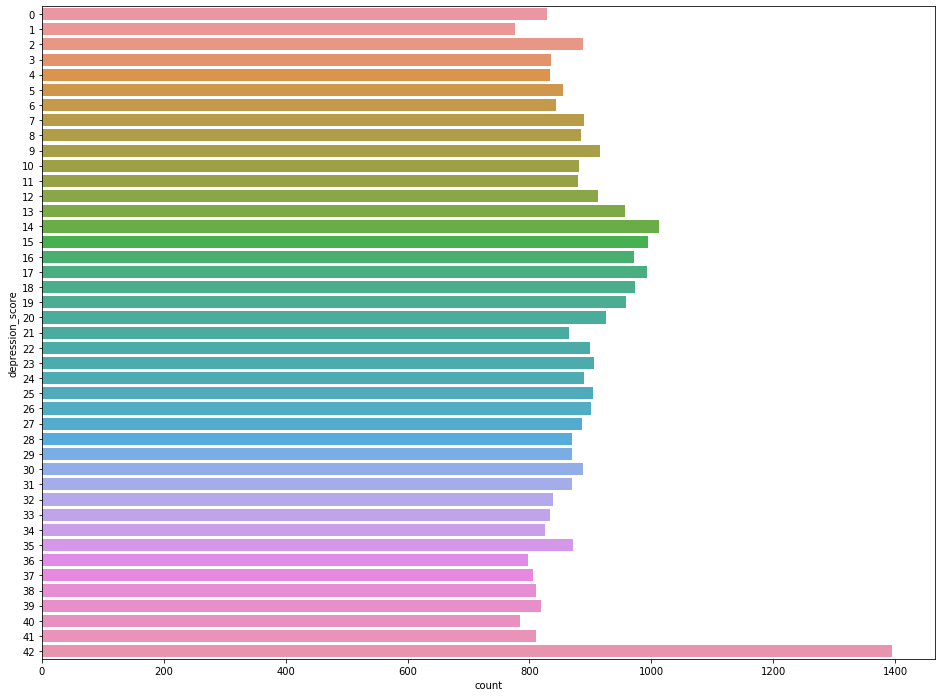

In [24]:
plt.figure(figsize=(16,12))
sns.countplot(y='depression_score',data=data)

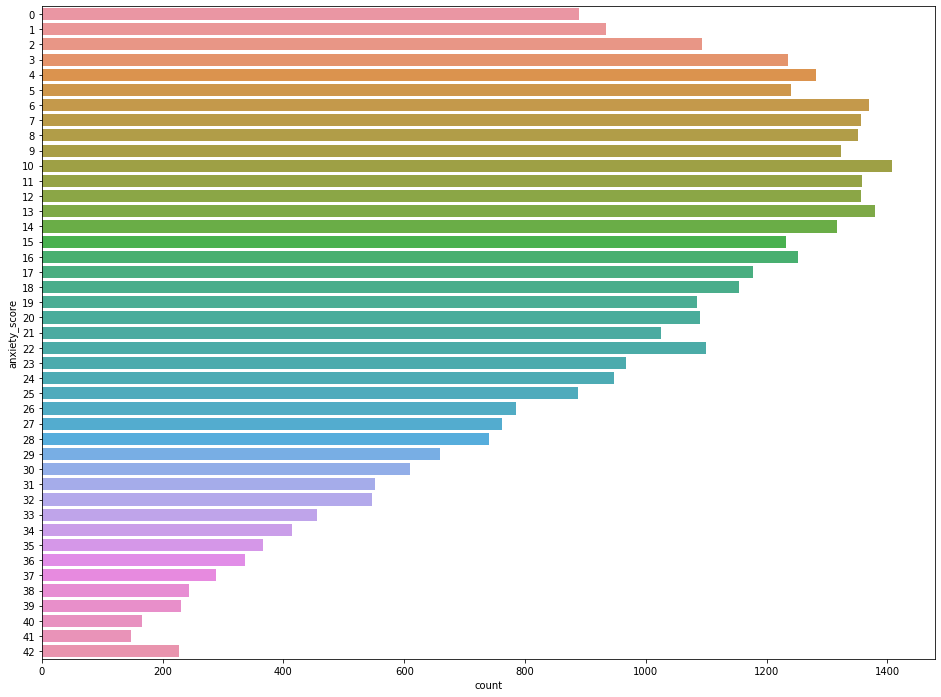

In [25]:
plt.figure(figsize=(16,12))
sns.countplot(y='anxiety_score',data=data)

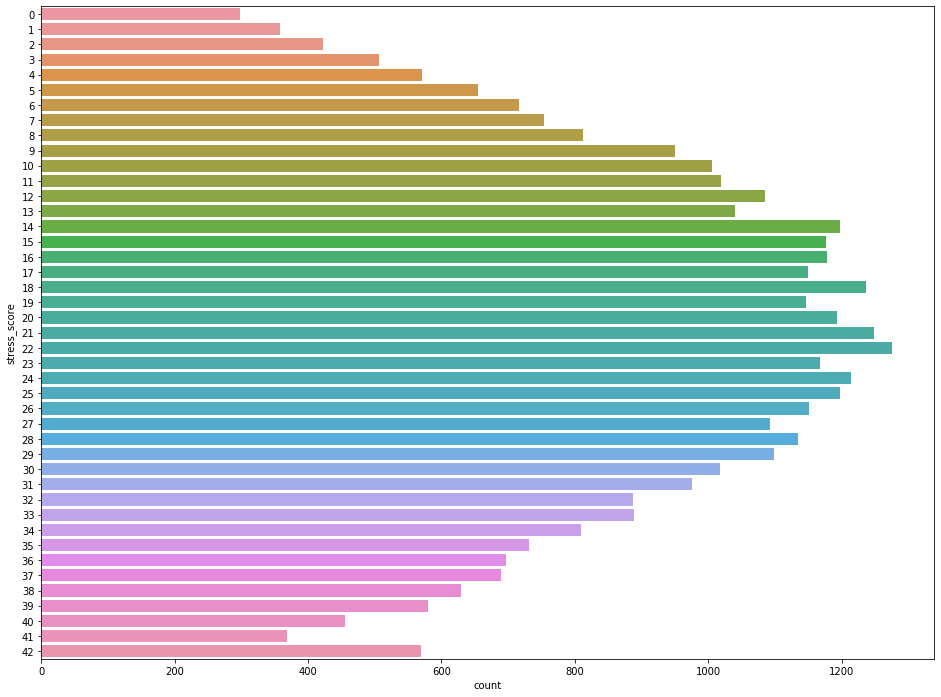

In [26]:
plt.figure(figsize=(16,12))
sns.countplot(y='stress_score',data=data)

### (iii) Combine religions

Combine `Christian (Catholic)`, `Christian (Mormon)`, `Christian (Protestant)`, `Christian (Other)` into one category `Christian` with category code `4`.

In [27]:
data.loc[data['religion']==5,'religion'] = 4
data.loc[data['religion']==6,'religion'] = 4
data.loc[data['religion']==7,'religion'] = 4

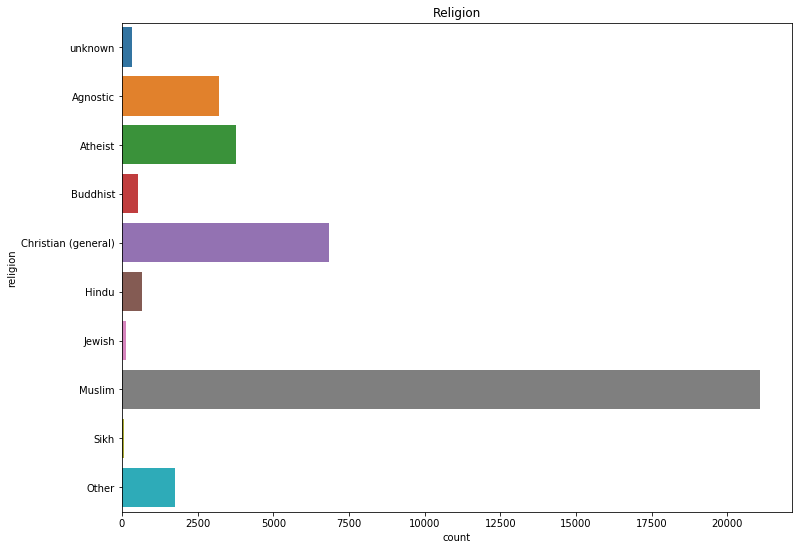

In [28]:
plt.figure(figsize=(12,9))
ax = sns.countplot(y= 'religion', data=data)
ax.set_yticklabels(["unknown","Agnostic", "Atheist", "Buddhist", "Christian (general)", "Hindu", "Jewish", "Muslim", "Sikh", "Other"])
ax.set_title('Religion')
plt.show()

### (iv) Adjust Family Size.

`Family Size` is defined as total number of family member **including** you.

In [29]:
data = data[data.familysize != 0]

### (v) Major Name

In [30]:
major_list = list(data['major'].unique())

In [31]:
len(major_list)

5112

In [32]:
print(major_list)

[nan, 'biology', 'Psychology', 'Mechatronics engeenerieng', 'Music', 'Psychology ', 'computer programming', 'Sociology', 'Art', 'Biology and Philosophy dual major', 'criminal justice; sociology', 'Computer Science', 'Business', 'psychology', 'Civil Engineering', 'Acting', 'Biology', 'Hospitality', 'History', 'Statistics', 'Biologyst', 'Education ', 'business administration ', 'Architecture', 'software engineering', 'art history', 'education', 'art theory', 'Computer Science Engineering', 'Psychology&Philosophy', 'civil engineering', 'Marketing', '--', 'computer science', 'Medical Technology', 'Engineering ', 'nutrition', 'Law', 'Classics and Philosophy', 'None', 'physics', 'English', 'Architecture ', 'Theology', 'CS', 'Accounting', 'Literature', 'Microbiology', 'T', 'Undecided', 'Professional Writing', 'Nursing', 'philosophy', 'Geology', 'Italian/history of art', 'telecom', 'sociology and psychology', 'medicine', 'geography', 'Theatre', 'Construction Management', 'logistics', 'Food Sci

#### Decide a format for all the majors.

Change all the letters to lower case. Then remove the space. 

In [33]:
data.loc[data['major']=='biology', 'major'] = 'Biology'
data.loc[data['major']==' Biology', 'major'] = 'Biology'
data.loc[data['major']=='BIOLOGY', 'major'] = 'Biology'
data.loc[data['major']=='BIOLOGY ', 'major'] = 'Biology'
data.loc[data['major']=='Biologyst', 'major'] = 'Biology'
data.loc[data['major']=='Biology ', 'major'] = 'Biology'
data.loc[data['major']=='Biologyy', 'major'] = 'Biology'
data.loc[data['major']=='biology science', 'major'] = 'Biology'
data.loc[data['major']=='Biology Science', 'major'] = 'Biology'
data.loc[data['major']=='Biology Education', 'major'] = 'Biology'
data.loc[data['major']=='Biology: Pre-med', 'major'] = 'Biology'
data.loc[data['major']=='Biology/ Pre-med', 'major'] = 'Biology'
data.loc[data['major']=='Biology W/ Med lab specifics', 'major'] = 'Biology'
data.loc[data['major']=='Marine biology', 'major'] = 'Biology'
data.loc[data['major']=='Marine biology ', 'major'] = 'Biology'
data.loc[data['major']=='Biology Marine', 'major'] = 'Biology'
data.loc[data['major']=='Aquatic biology', 'major'] = 'Biology'
data.loc[data['major']=='Fisheries Biology', 'major'] = 'Biology'
data.loc[data['major']=='Science in Biology', 'major'] = 'Biology'
data.loc[data['major']=='Science biology', 'major'] = 'Biology'
data.loc[data['major']=='BS Biology', 'major'] = 'Biology'
data.loc[data['major']=='Conservation Biology ', 'major'] = 'Biology'
data.loc[data['major']=='CONSERVATION BIOLOGY', 'major'] = 'Biology'
data.loc[data['major']=='Science biology', 'major'] = 'Biology'
data.loc[data['major']=='Marine Biology', 'major'] = 'Biology'
data.loc[data['major']=='marine biology', 'major'] = 'Biology'
data.loc[data['major']=='Animal Biology', 'major'] = 'Biology'
data.loc[data['major']=='induatrial biology', 'major'] = 'Biology'

In [34]:
data['major'].nunique()

5086

There are too many typos and inconsistencies. If needed, will adjust all the major names.

### (vi) VCL Validation

A value of `1` is checked, `0` means unchecked. The words at VCL6, VCL9, and VCL12 are not real words and can be used as a validity check.

In [35]:
data = data[data.VCL6 != 1]

In [36]:
data = data[data.VCL9 != 1]

In [37]:
data = data[data.VCL12 != 1]

In [38]:
data.shape

(32392, 183)

Number of samples decreases from `38336` to `33273`.

## 2. Regression among DASS

### (i). General Regression Diagram 
* Linear
* Second Order

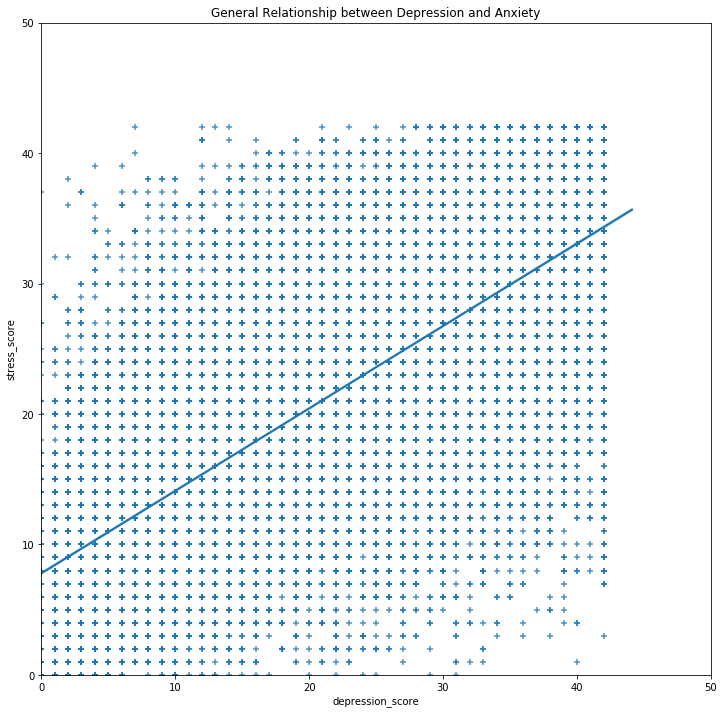

In [138]:
plt.figure(figsize=(12,12))
ax = sns.regplot(x='depression_score',y='stress_score',marker="+",data=data)
ax.set_title("General Relationship between Depression and Anxiety")
ax.set_xlim(0,50)
ax.set_ylim(0,50)
plt.show()

In [40]:
data.depression_score.corr(data.anxiety_score)

0.6669803382802052

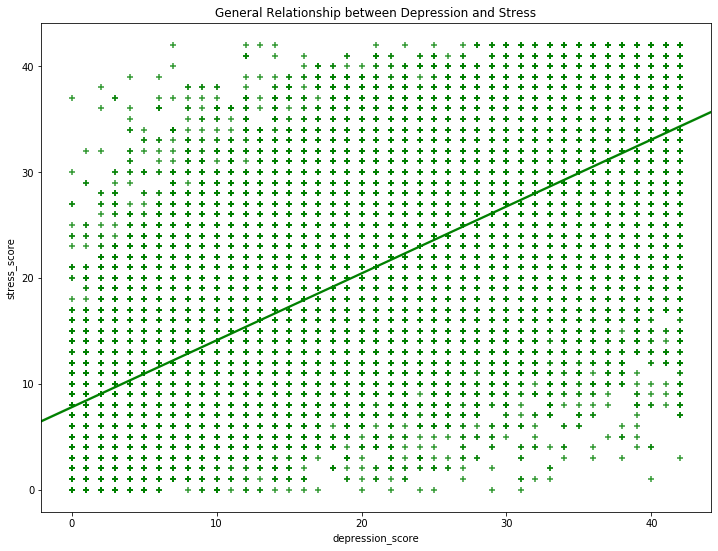

In [41]:
plt.figure(figsize=(12,9))
ax = sns.regplot(x='depression_score',y='stress_score',marker="+",color='g',data=data)
ax.set_title("General Relationship between Depression and Stress")
plt.show()

In [42]:
data.depression_score.corr(data.stress_score)

0.7412404612783698

<Figure size 864x648 with 0 Axes>

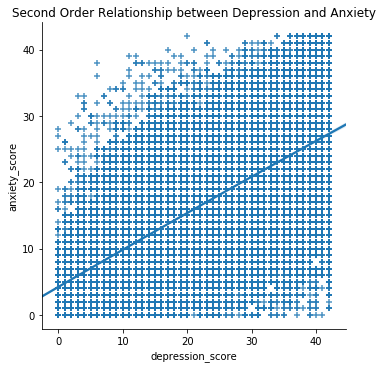

In [43]:
plt.figure(figsize=(12,9))
ax = sns.lmplot(x='depression_score',y='anxiety_score',data=data, order=2, markers="+")
plt.title("Second Order Relationship between Depression and Anxiety")
plt.show()

<Figure size 864x648 with 0 Axes>

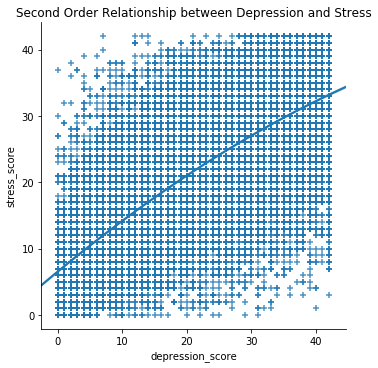

In [44]:
plt.figure(figsize=(12,9))
ax = sns.lmplot(x='depression_score',y='stress_score',data=data, order=2, markers="+")
plt.title("Second Order Relationship between Depression and Stress")
plt.show()

### (ii) Regression according to demographics
* sexual orientation
* gender
* education
* age
* race
* hand 

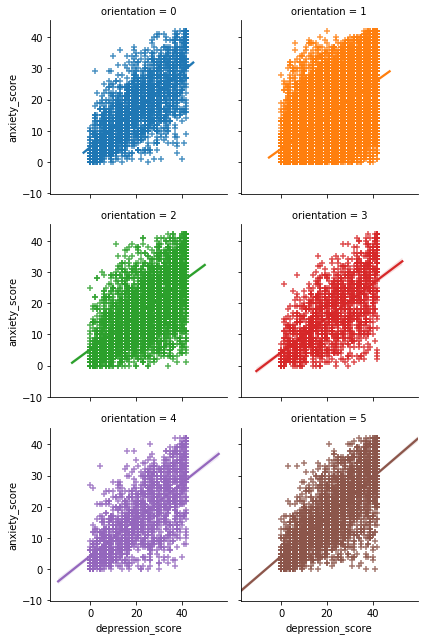

In [45]:
g = sns.lmplot(x="depression_score",y="anxiety_score",
               hue="orientation",col="orientation",
               data=data,col_wrap=2, height=3, markers="+")

# ["unknown","heterosexual","bisexual","homosexual","asexual","other"]

<Figure size 864x648 with 0 Axes>

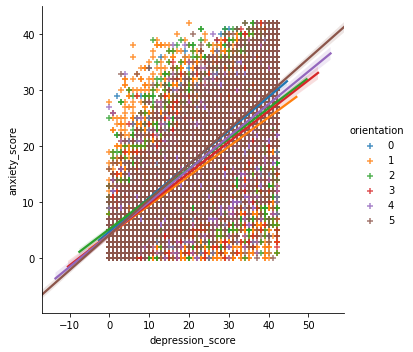

In [46]:
plt.figure(figsize=(12,9))
g = sns.lmplot(x="depression_score",y="anxiety_score",
               hue="orientation",
               data=data, markers="+")

# ["unknown","heterosexual","bisexual","homosexual","asexual","other"]

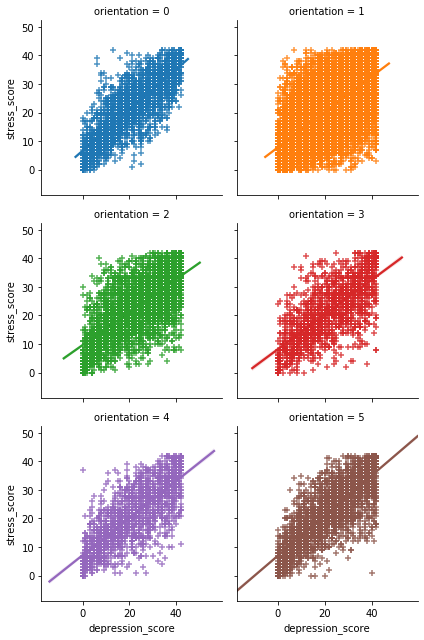

In [47]:
g = sns.lmplot(x="depression_score",y="stress_score",
               hue="orientation",col="orientation",
               data=data,col_wrap=2, height=3, markers="+")

# ["unknown","heterosexual","bisexual","homosexual","asexual","other"]

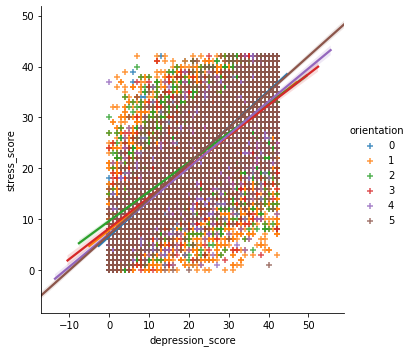

In [48]:
g = sns.lmplot(x="depression_score",y="stress_score",
               hue="orientation",
               data=data, markers="+")

# ["unknown","heterosexual","bisexual","homosexual","asexual","other"]

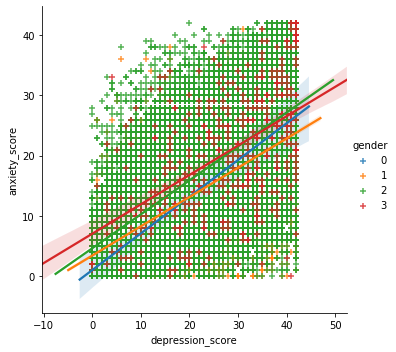

In [49]:
g = sns.lmplot(x="depression_score",y="anxiety_score",
               hue="gender",
               data=data, markers="+")

# ["unknown","male","female","other"]

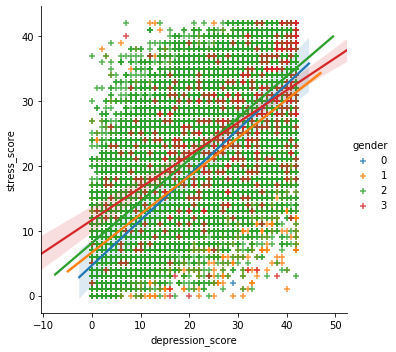

In [50]:
g = sns.lmplot(x="depression_score",y="stress_score",
               hue="gender",
               data=data, markers="+")

# ["unknown","male","female","other"]

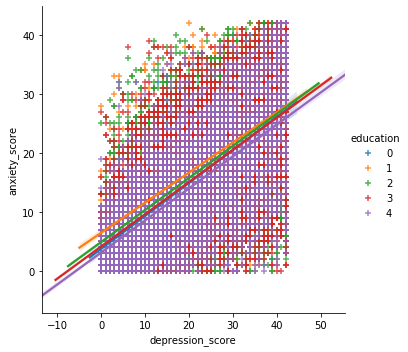

In [51]:
g = sns.lmplot(x="depression_score",y="anxiety_score",
               hue="education",
               data=data, markers="+")

# ["unknown","less than high school", "high school", 
# "university degree", "graduate degree"]

Try to remove the "unknown"

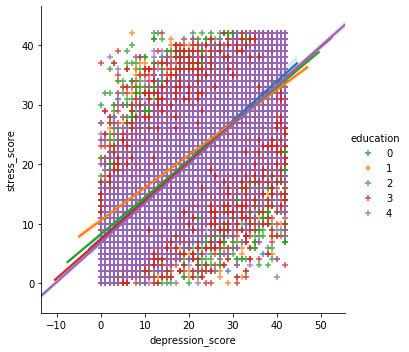

In [52]:
g = sns.lmplot(x="depression_score",y="stress_score",
               hue="education",
               data=data, markers="+")

# ["unknown","less than high school", "high school", 
# "university degree", "graduate degree"]

In [53]:
data['categorical_age'] = data['age']

In [54]:
data.loc[ data['categorical_age'] <= 16, 'categorical_age'] = 0
data.loc[(data['categorical_age'] > 16) & (data['categorical_age'] <= 32), 'categorical_age'] = 1
data.loc[(data['categorical_age'] > 32) & (data['categorical_age'] <= 48), 'categorical_age'] = 2
data.loc[(data['categorical_age'] > 48) & (data['categorical_age'] <= 64), 'categorical_age'] = 3
data.loc[ data['categorical_age'] > 64, 'categorical_age'] = 4 

Try to remove these datapoints, and only keep the regression line there.

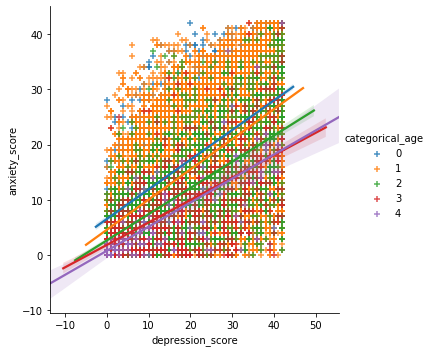

In [55]:
g = sns.lmplot(x="depression_score",y="anxiety_score",
               hue="categorical_age",
               data=data, markers="+")

# age sensitive.

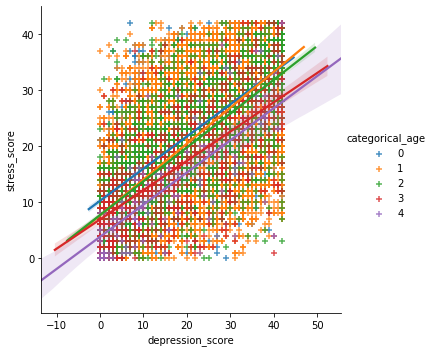

In [56]:
g = sns.lmplot(x="depression_score",y="stress_score",
               hue="categorical_age",
               data=data, markers="+")

# Below 36 vs. Above 36.

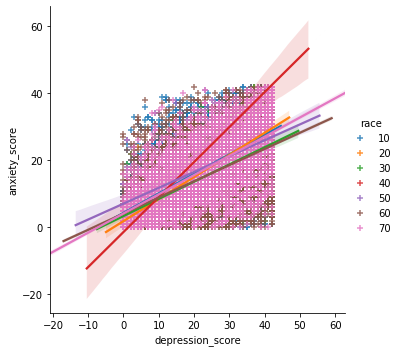

In [57]:
g = sns.lmplot(x="depression_score",y="anxiety_score",
               hue="race",
               data=data, markers="+")

# ["Asian", "Arab", "Black", "Indigenous Australian", "Native American","White", "Other"]

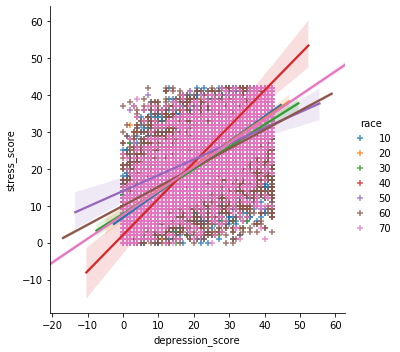

In [58]:
g = sns.lmplot(x="depression_score",y="stress_score",
               hue="race",
               data=data, markers="+")

# ["Asian", "Arab", "Black", "Indigenous Australian", "Native American","White", "Other"]

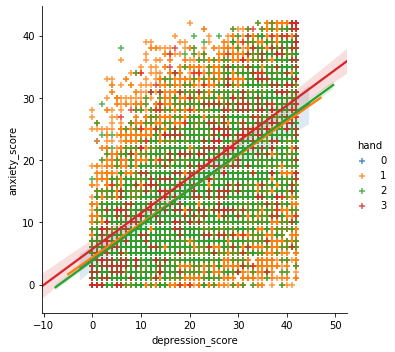

In [59]:
g = sns.lmplot(x="depression_score",y="anxiety_score",
               hue="hand",
               data=data, markers="+")

# ["unknown","right","left","both"]

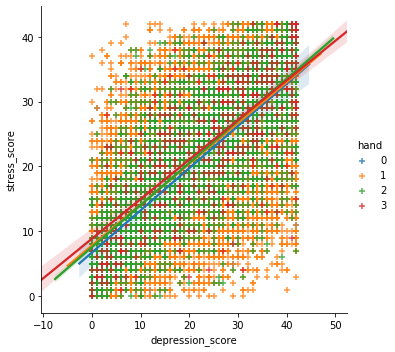

In [60]:
g = sns.lmplot(x="depression_score",y="stress_score",
               hue="hand",
               data=data, markers="+")

# ["unknown","right","left","both"]
# NOT significant on relationships among DASS -- not considered as a feature.

## 3. Regression between demographics and DASS.

* education
* urban
* age 
* orientation
* family size

### (i) Education

In [61]:
data['education_yrs'] = data['education']

In [62]:
data.head()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,anxiety_category,depression_score,depression_category,Extroversion,Agreeableness,Conscientiousness,Emotional_stability,Openness_to_experience,categorical_age,education_yrs
0,4,28,3890,4,25,2122,2,16,1944,4,...,5,27,4,1,9,9,1,13,0,2
1,4,2,8118,1,36,2890,2,35,4777,3,...,4,24,4,9,9,4,1,7,0,2
2,3,7,5784,1,33,4373,4,41,3242,1,...,3,39,5,3,7,4,8,10,1,2
3,2,23,5081,3,11,6837,2,37,5521,1,...,4,16,3,4,12,13,9,12,0,1
4,2,36,3215,2,13,7731,3,5,4156,4,...,5,32,5,4,7,4,4,9,1,3


In [63]:
# ["unknown","less than high school", 
# "high school", "university degree", "graduate degree"]

data.loc[data['education_yrs'] == 1,'education_yrs'] = 8
data.loc[data['education_yrs'] == 2,'education_yrs'] = 12
data.loc[data['education_yrs'] == 3,'education_yrs'] = 16
data.loc[data['education_yrs'] == 4,'education_yrs'] = 19

In [64]:
data.head()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,anxiety_category,depression_score,depression_category,Extroversion,Agreeableness,Conscientiousness,Emotional_stability,Openness_to_experience,categorical_age,education_yrs
0,4,28,3890,4,25,2122,2,16,1944,4,...,5,27,4,1,9,9,1,13,0,12
1,4,2,8118,1,36,2890,2,35,4777,3,...,4,24,4,9,9,4,1,7,0,12
2,3,7,5784,1,33,4373,4,41,3242,1,...,3,39,5,3,7,4,8,10,1,12
3,2,23,5081,3,11,6837,2,37,5521,1,...,4,16,3,4,12,13,9,12,0,8
4,2,36,3215,2,13,7731,3,5,4156,4,...,5,32,5,4,7,4,4,9,1,16


In [139]:
data = data[data.education_yrs != 0]

In [140]:
data.shape

(32002, 185)

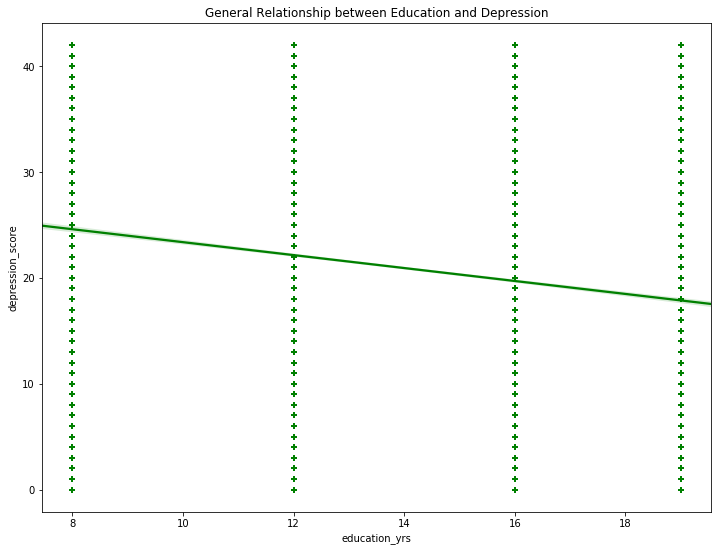

In [141]:
plt.figure(figsize=(12,9))
ax = sns.regplot(x='education_yrs',y='depression_score',
                 marker="+",color='g',data=data)
ax.set_title("General Relationship between Education and Depression")
plt.show()

In [142]:
data.education_yrs.corr(data.depression_score)

-0.15717217384420845

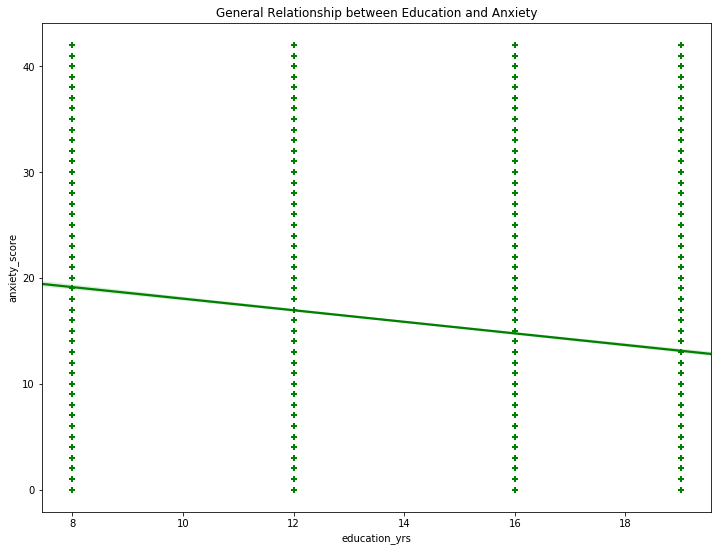

In [143]:
plt.figure(figsize=(12,9))
ax = sns.regplot(x='education_yrs',y='anxiety_score',
                 marker="+",color='g',data=data)
ax.set_title("General Relationship between Education and Anxiety")
plt.show()

In [144]:
data.education_yrs.corr(data.anxiety_score)

-0.17079653359574765

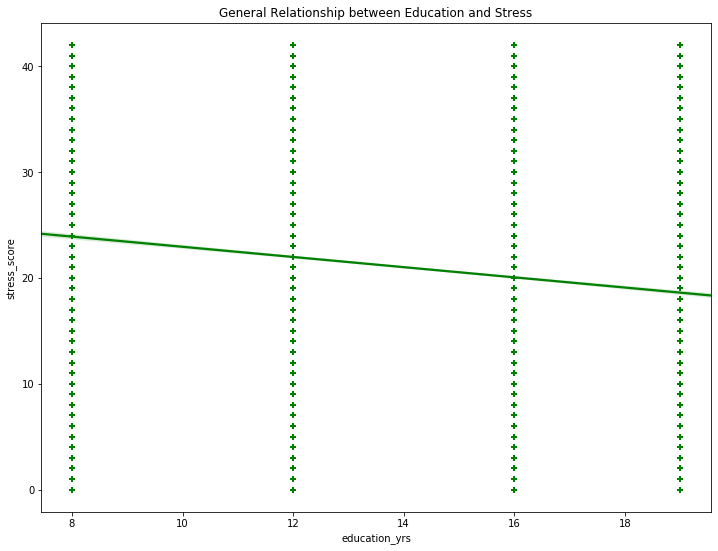

In [145]:
plt.figure(figsize=(12,9))
ax = sns.regplot(x='education_yrs',y='stress_score',
                 marker="+",color='g',data=data)
ax.set_title("General Relationship between Education and Stress")
plt.show()

In [146]:
data.education_yrs.corr(data.stress_score)

-0.14516914235532283

### (ii) Urban

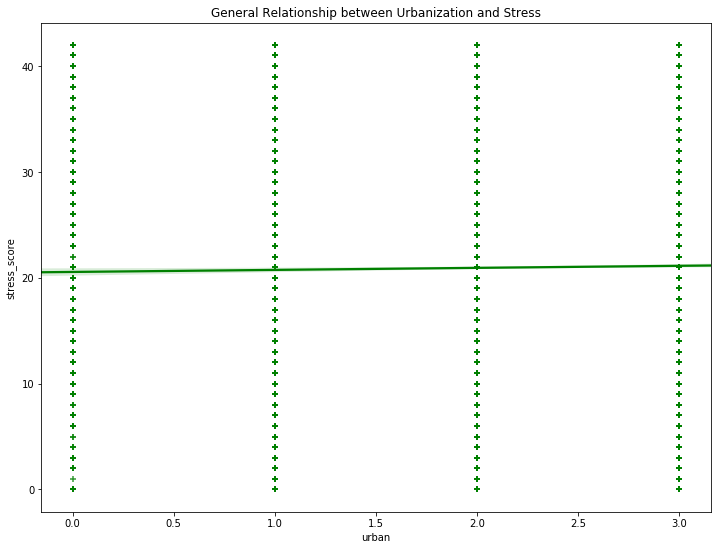

In [71]:
plt.figure(figsize=(12,9))
ax = sns.regplot(x='urban',y='stress_score',
                 marker="+",color='g',data=data)
ax.set_title("General Relationship between Urbanization and Stress")
plt.show()

In [72]:
data.urban.corr(data.stress_score)

0.014832006643993416

In [73]:
data['urban'].unique()

array([3, 2, 1, 0])

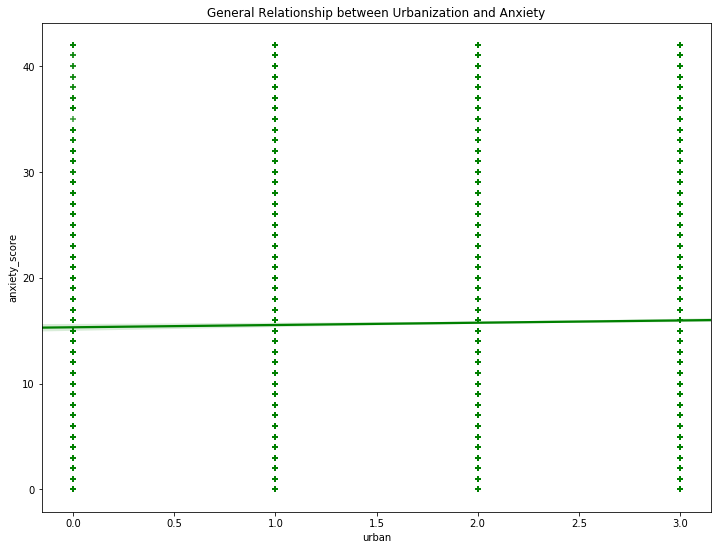

In [74]:
plt.figure(figsize=(12,9))
ax = sns.regplot(x='urban',y='anxiety_score',
                 marker="+",color='g',data=data)
ax.set_title("General Relationship between Urbanization and Anxiety")
plt.show()

In [75]:
data.urban.corr(data.anxiety_score)

0.017167455719445324

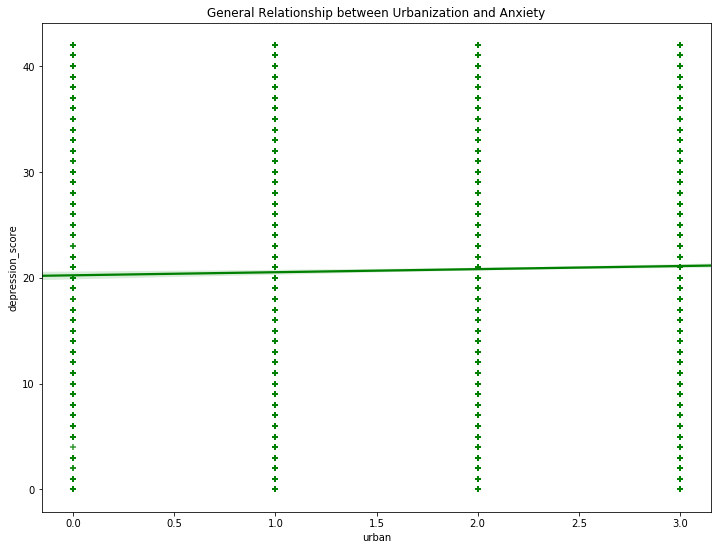

In [76]:
plt.figure(figsize=(12,9))
ax = sns.regplot(x='urban',y='depression_score',
                 marker="+",color='g',data=data)
ax.set_title("General Relationship between Urbanization and Anxiety")
plt.show()

In [77]:
data.urban.corr(data.depression_score)

0.019154498842490354

### (iii) Age

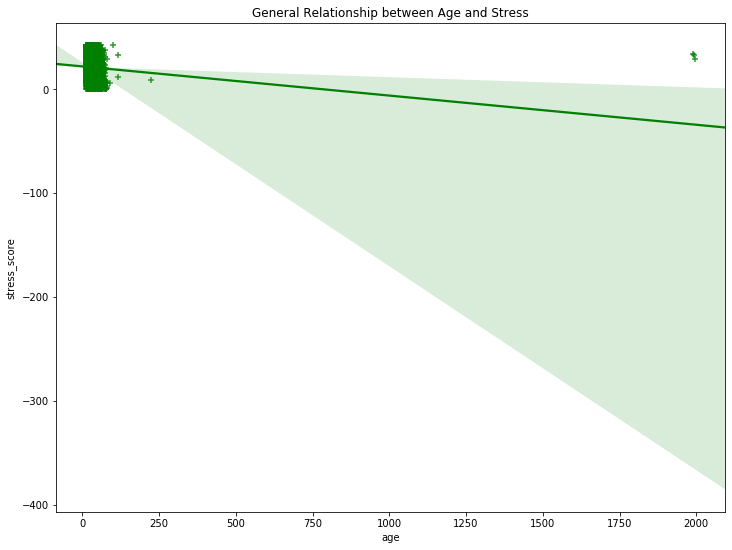

In [78]:
plt.figure(figsize=(12,9))
ax = sns.regplot(x='age',y='stress_score',
                 marker="+",color='g',data=data)
ax.set_title("General Relationship between Age and Stress")
plt.show()

In [79]:
data['age'].unique()

array([  16,   17,   13,   19,   20,   18,   15,   31,   21,   23,   26,
         43,   35,   25,   24,   40,   27,   28,   60,   14,   37,   46,
         57,   41,   22,   55,   36,   30,   32,   56,   71,   42,   44,
         38,   49,   29,   33,   54,   53,   50,   47,   48,   58,   68,
         39,   62,   59,   52,   77,   63,   34,   45,   65,   61,   72,
         51,   70,   73,   64,   66,   67,   78,   69,   80,  223,   79,
       1996,   89,  117,   76,   75,  115,   74, 1993, 1991,   99])

Since the format is not uniform, adjust data to make it correct.

In [147]:
# calculate age using 2018.(since data is collected b/t 2017 and 2019).
data.loc[data['age']==1996,'age'] = 22
#data.loc[data['age']==223,'age'] = 23
data.loc[data['age']==1998,'age'] = 20
#data.loc[data['age']==115,'age'] = 15
#data.loc[data['age']==117,'age'] = 17
data.loc[data['age']==1993,'age'] = 25
data.loc[data['age']==1991,'age'] = 27

data = data[data.age != 223]
data = data[data.age != 115]
data = data[data.age != 117]

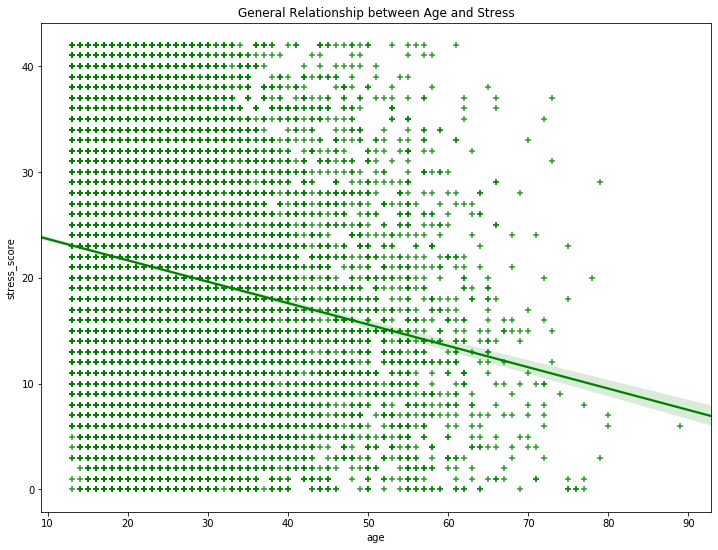

In [148]:
plt.figure(figsize=(12,9))
ax = sns.regplot(x='age',y='stress_score',
                 marker="+",color='g',data=data)
ax.set_title("General Relationship between Age and Stress")
plt.show()

In [149]:
data.age.corr(data.stress_score)

-0.16138213411854688

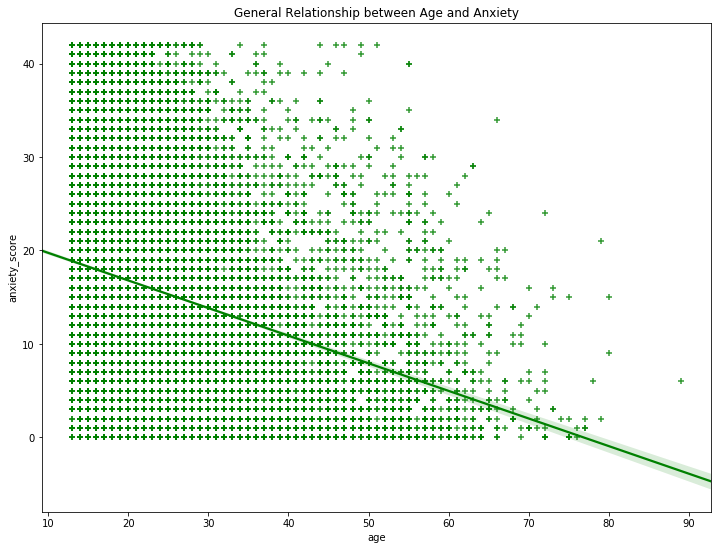

In [150]:
plt.figure(figsize=(12,9))
ax = sns.regplot(x='age',y='anxiety_score',
                 marker="+",color='g',data=data)
ax.set_title("General Relationship between Age and Anxiety")
plt.show()

In [151]:
data.age.corr(data.anxiety_score)

-0.24461645101385648

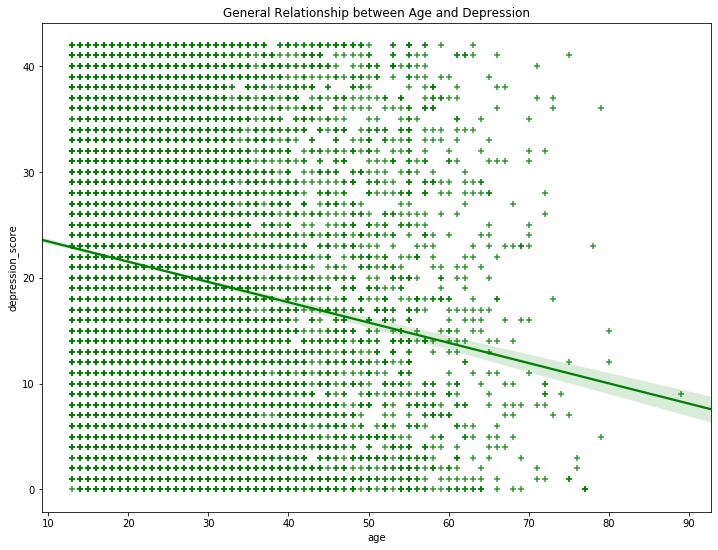

In [152]:
plt.figure(figsize=(12,9))
ax = sns.regplot(x='age',y='depression_score',
                 marker="+",color='g',data=data)
ax.set_title("General Relationship between Age and Depression")
plt.show()

In [153]:
data.age.corr(data.depression_score)

-0.1304833195656915

### (iv) Orientation

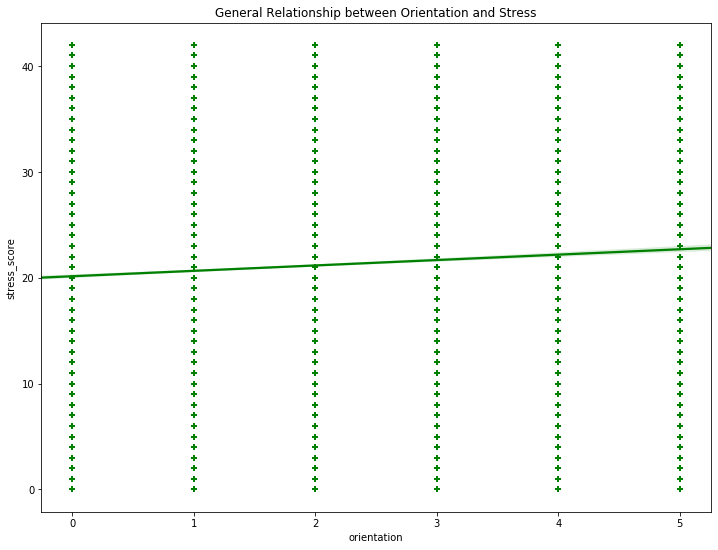

In [87]:
# ["unknown","heterosexual","bisexual","homosexual","asexual","other"]
plt.figure(figsize=(12,9))
ax = sns.regplot(x='orientation',y='stress_score',
                 marker="+",color='g',data=data)
ax.set_title("General Relationship between Orientation and Stress")
plt.show()

In [88]:
data.orientation.corr(data.stress_score)

0.06601955563368127

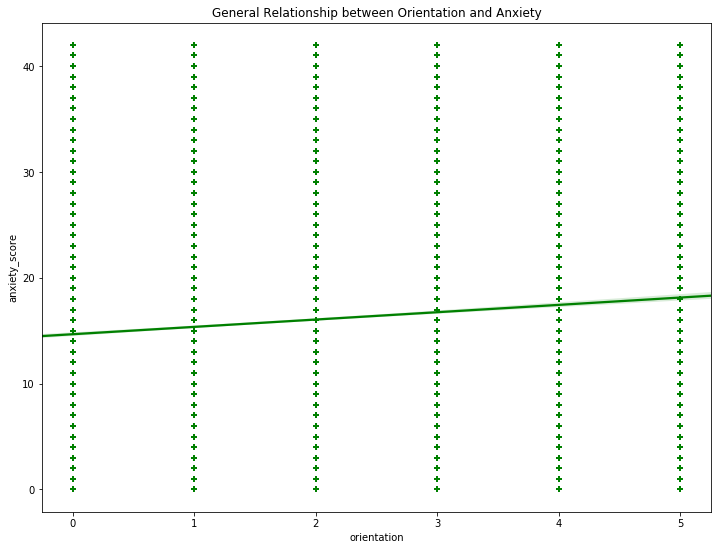

In [89]:
plt.figure(figsize=(12,9))
ax = sns.regplot(x='orientation',y='anxiety_score',
                 marker="+",color='g',data=data)
ax.set_title("General Relationship between Orientation and Anxiety")
plt.show()

In [90]:
data.orientation.corr(data.anxiety_score)

0.09292528205306687

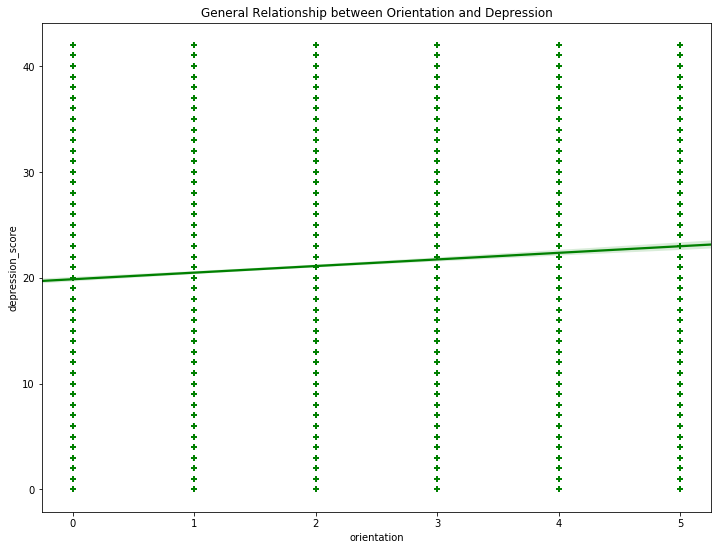

In [91]:
plt.figure(figsize=(12,9))
ax = sns.regplot(x='orientation',y='depression_score',
                 marker="+",color='g',data=data)
ax.set_title("General Relationship between Orientation and Depression")
plt.show()

In [92]:
data.orientation.corr(data.depression_score)

0.06890073969569656

### (v) Family Size

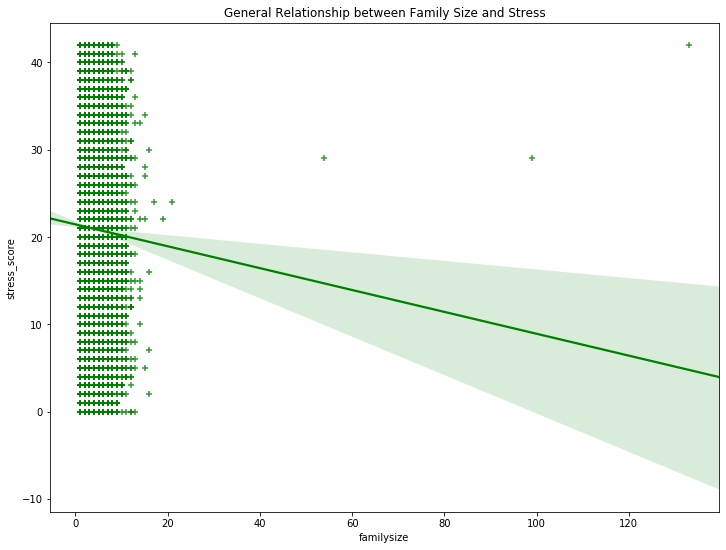

In [93]:
plt.figure(figsize=(12,9))
ax = sns.regplot(x='familysize',y='stress_score',
                 marker="+",color='g',data=data)
ax.set_title("General Relationship between Family Size and Stress")
plt.show()

In [94]:
data['familysize'].unique()

array([  2,   4,   3,   5,   1,   6,   8,  12,   7,   9,  13,  10,  16,
        11,  99,  54,  15,  17,  14,  19,  21, 133])

In [95]:
data = data[data.familysize <= 30]

In [96]:
data['familysize'].unique()

array([ 2,  4,  3,  5,  1,  6,  8, 12,  7,  9, 13, 10, 16, 11, 15, 17, 14,
       19, 21])

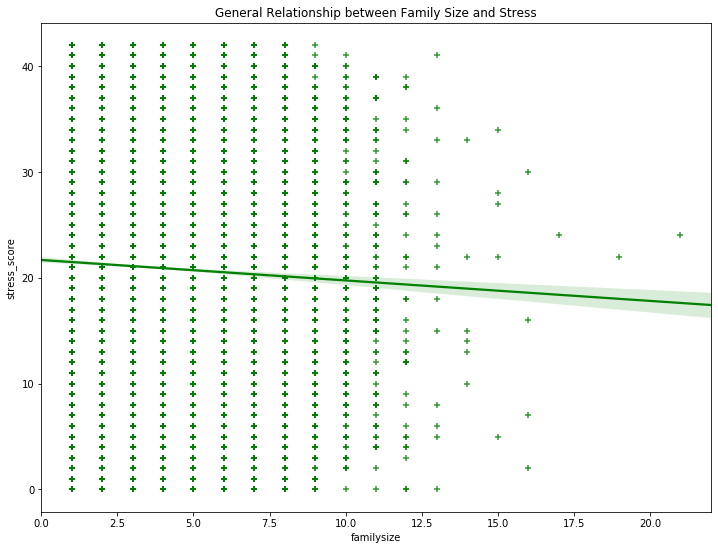

In [97]:
plt.figure(figsize=(12,9))
ax = sns.regplot(x='familysize',y='stress_score',
                 marker="+",color='g',data=data)
ax.set_title("General Relationship between Family Size and Stress")
plt.show()

In [98]:
data.familysize.corr(data.stress_score)

-0.034105591419178

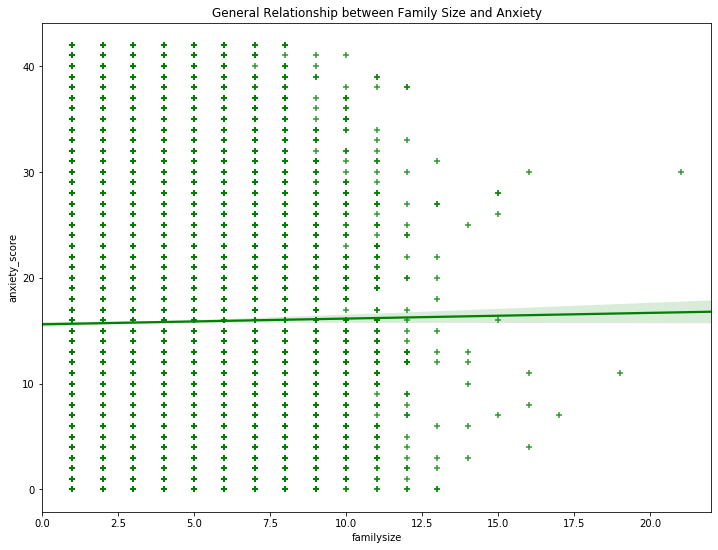

In [99]:
plt.figure(figsize=(12,9))
ax = sns.regplot(x='familysize',y='anxiety_score',
                 marker="+",color='g',data=data)
ax.set_title("General Relationship between Family Size and Anxiety")
plt.show()

In [100]:
data.familysize.corr(data.anxiety_score)

0.009871761281311668

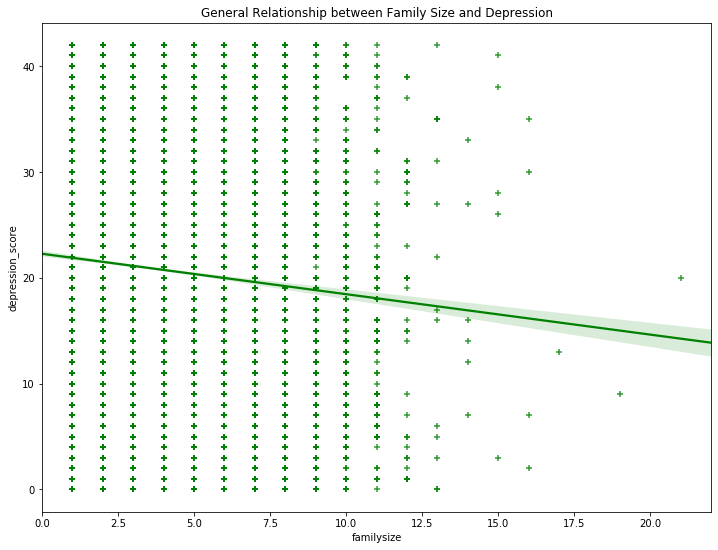

In [101]:
plt.figure(figsize=(12,9))
ax = sns.regplot(x='familysize',y='depression_score',
                 marker="+",color='g',data=data)
ax.set_title("General Relationship between Family Size and Depression")
plt.show()

In [102]:
data.familysize.corr(data.depression_score)

-0.05747745086115356

## 4. Regression between Personality and DASS
---
***Personality Scales:***
* Extroversion
* Agreeableness
* Conscientiousness
* Emotional Stability
* Openness to Experience

### (i) Correlation between Depression and Personality Factors.

Text(0.5, 1.0, 'Relationship between Depression and Extroversion')

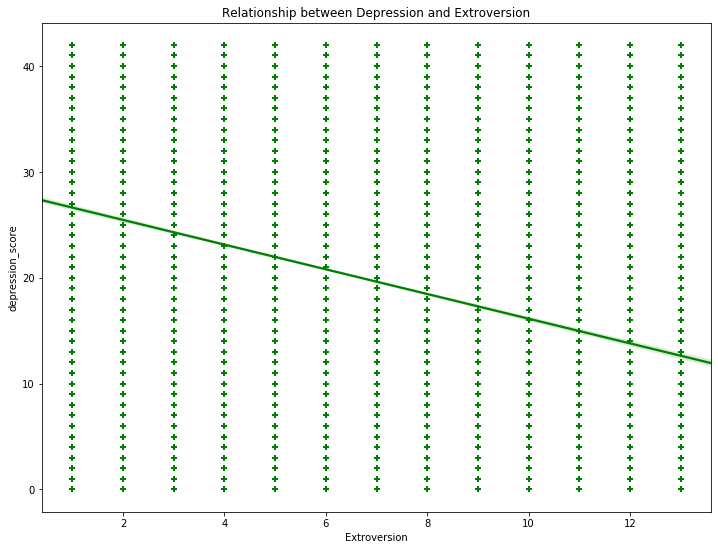

In [103]:
plt.figure(figsize = (12,9))
ax = sns.regplot(x='Extroversion', y='depression_score',marker="+",color='g',data=data)
ax.set_title("Relationship between Depression and Extroversion")

In [104]:
data.depression_score.corr(data.Extroversion)

-0.2939109534778424

Text(0.5, 1.0, 'Relationship between Depression and Agreeableness')

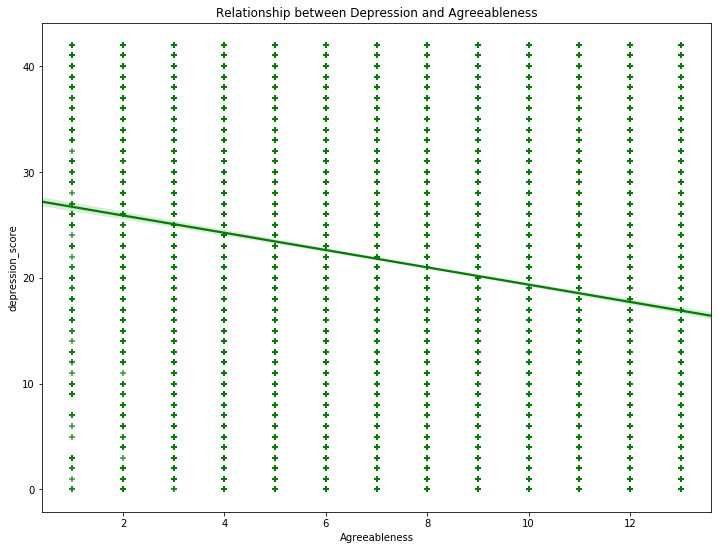

In [105]:
plt.figure(figsize = (12,9))
ax = sns.regplot(x='Agreeableness', y='depression_score',marker="+",color='g',data=data)
ax.set_title("Relationship between Depression and Agreeableness")

In [106]:
data.depression_score.corr(data.Agreeableness)

-0.16062636818431808

Text(0.5, 1.0, 'Relationship between Depression and Conscientiousness')

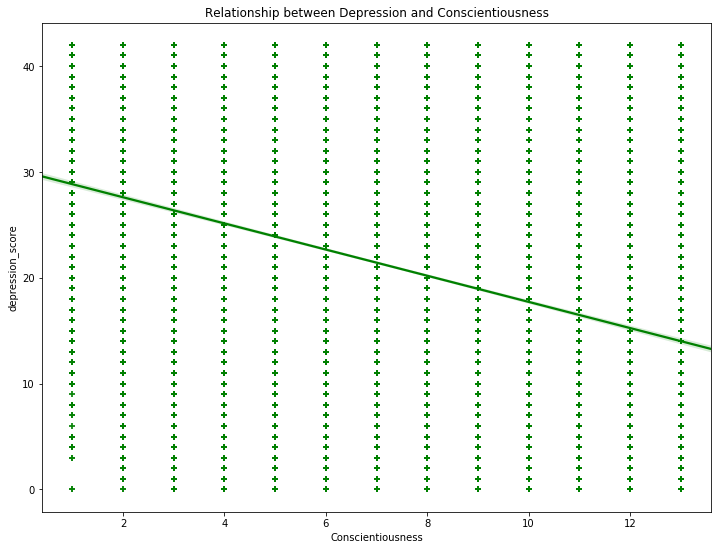

In [107]:
plt.figure(figsize = (12,9))
ax = sns.regplot(x='Conscientiousness', y='depression_score',marker="+",color='g',data=data)
ax.set_title("Relationship between Depression and Conscientiousness")

In [108]:
data.depression_score.corr(data.Conscientiousness)

-0.2983539450525827

Text(0.5, 1.0, 'Relationship between Depression and Emotional Stability')

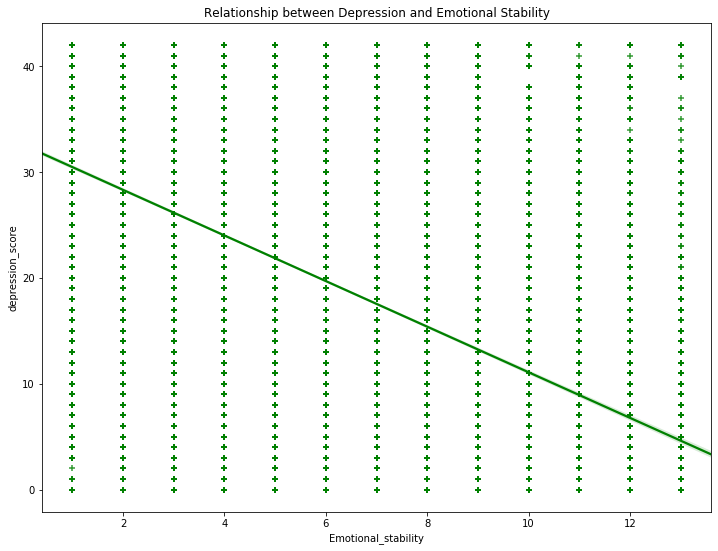

In [109]:
plt.figure(figsize = (12,9))
ax = sns.regplot(x='Emotional_stability', y='depression_score',marker="+",color='g',data=data)
ax.set_title("Relationship between Depression and Emotional Stability")

In [110]:
data.depression_score.corr(data.Emotional_stability)

-0.5325715148372516

Text(0.5, 1.0, 'Relationship between Depression and Openness to Experience')

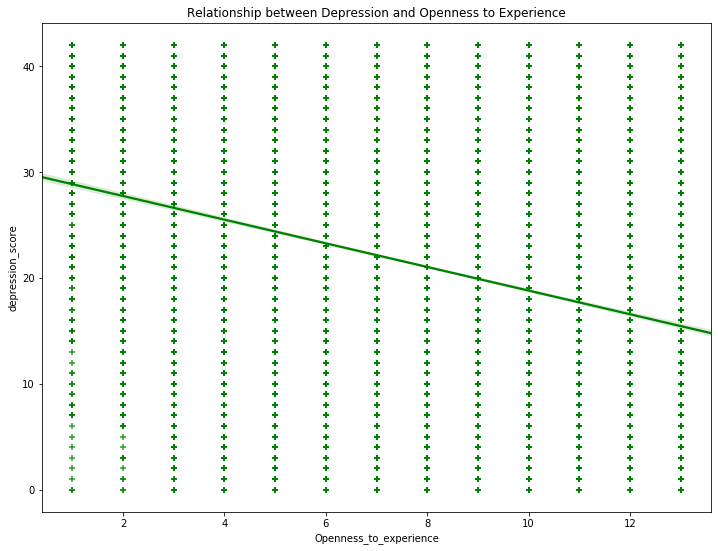

In [111]:
plt.figure(figsize = (12,9))
ax = sns.regplot(x='Openness_to_experience', y='depression_score',marker="+",color='g',data=data)
ax.set_title("Relationship between Depression and Openness to Experience")

In [112]:
data.depression_score.corr(data.Openness_to_experience)

-0.24139493017779484

### (ii) Correlation between Anxiety and Personality Factors.

Text(0.5, 1.0, 'Relationship between Anxiety and Extroversion')

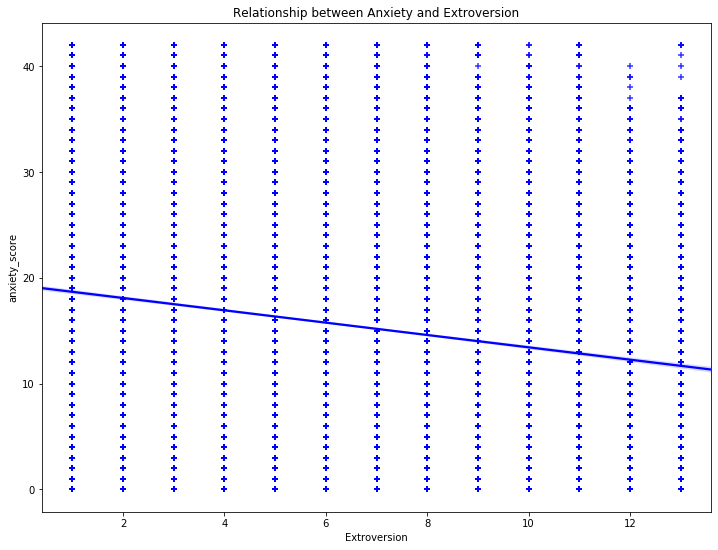

In [113]:
plt.figure(figsize = (12,9))
ax = sns.regplot(x='Extroversion', y='anxiety_score',marker="+",color='b',data=data)
ax.set_title("Relationship between Anxiety and Extroversion")

In [114]:
data.anxiety_score.corr(data.Extroversion)

-0.17840035497335852

Text(0.5, 1.0, 'Relationship between Anxiety and Agreeableness')

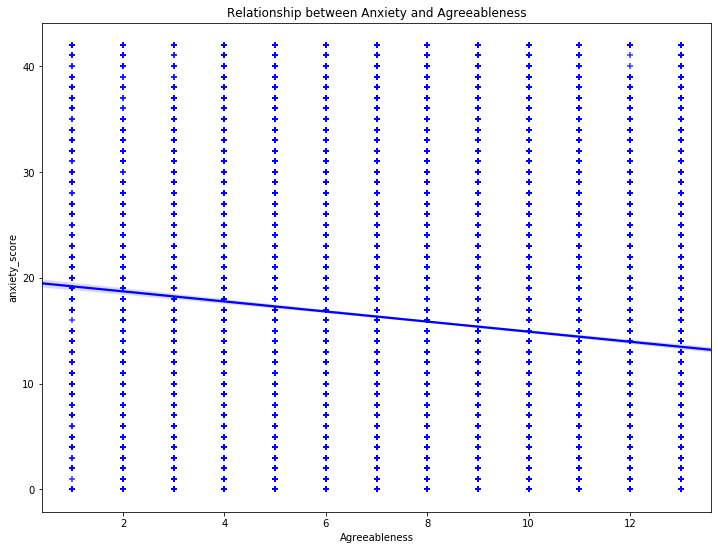

In [115]:
plt.figure(figsize = (12,9))
ax = sns.regplot(x='Agreeableness', y='anxiety_score',marker="+",color='b',data=data)
ax.set_title("Relationship between Anxiety and Agreeableness")

In [116]:
data.anxiety_score.corr(data.Agreeableness)

-0.11371361469365479

Text(0.5, 1.0, 'Relationship between Anxiety and Conscientiousness')

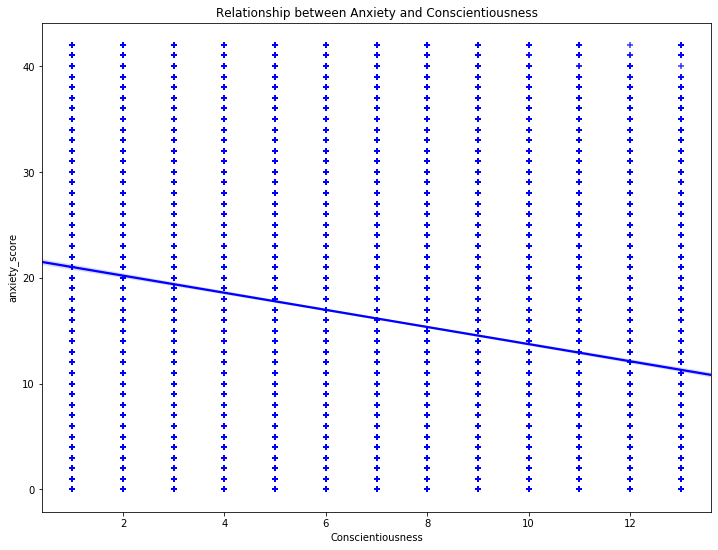

In [117]:
plt.figure(figsize = (12,9))
ax = sns.regplot(x='Conscientiousness', y='anxiety_score',marker="+",color='b',data=data)
ax.set_title("Relationship between Anxiety and Conscientiousness")

In [118]:
data.anxiety_score.corr(data.Conscientiousness)

-0.23725468937768096

Text(0.5, 1.0, 'Relationship between Anxiety and Emotional Stability')

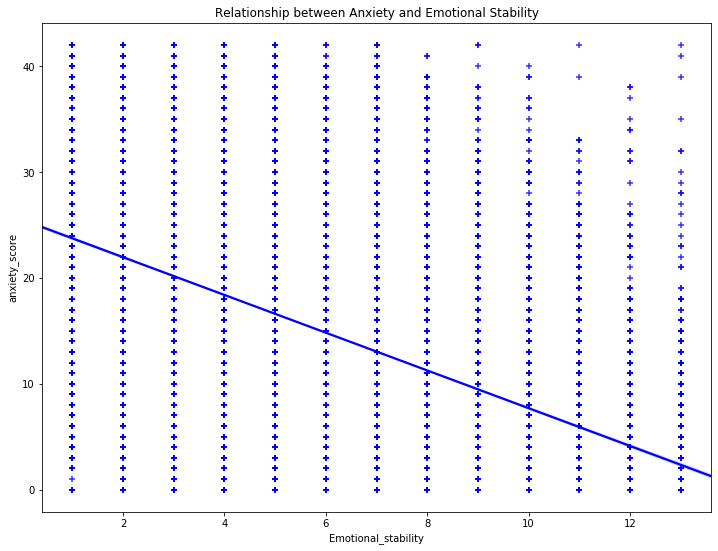

In [119]:
plt.figure(figsize = (12,9))
ax = sns.regplot(x='Emotional_stability', y='anxiety_score',marker="+",color='b',data=data)
ax.set_title("Relationship between Anxiety and Emotional Stability")

In [120]:
data.anxiety_score.corr(data.Emotional_stability)

-0.5356155413269538

Text(0.5, 1.0, 'Relationship between Anxiety and Openness to Experience')

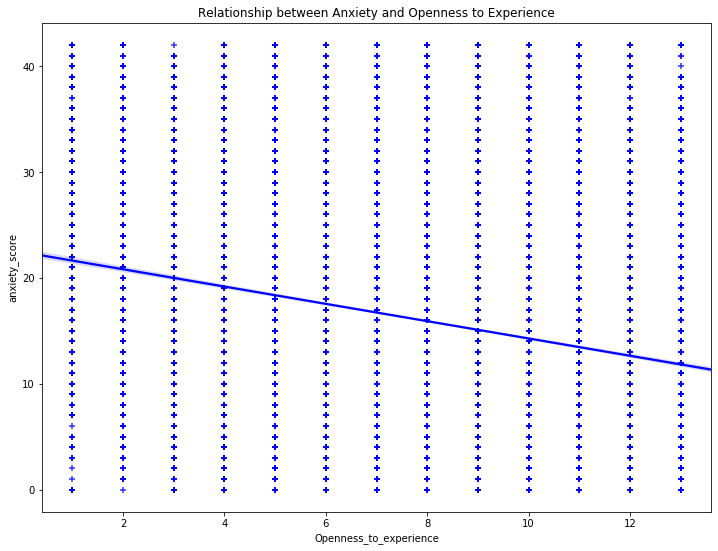

In [121]:
plt.figure(figsize = (12,9))
ax = sns.regplot(x='Openness_to_experience', y='anxiety_score',marker="+",color='b',data=data)
ax.set_title("Relationship between Anxiety and Openness to Experience")

In [122]:
data.anxiety_score.corr(data.Openness_to_experience)

-0.2145990968783934

### (iii) Correlation between Stress and Personality Factors.

Text(0.5, 1.0, 'Relationship between Stress and Extroversion')

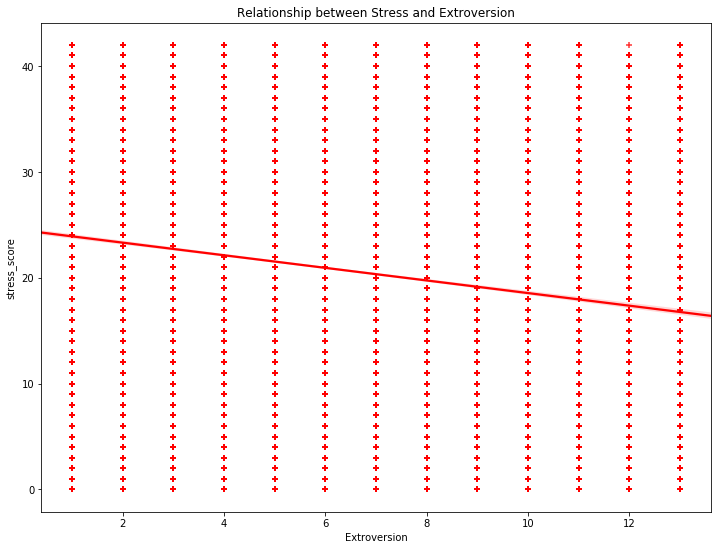

In [123]:
plt.figure(figsize = (12,9))
ax = sns.regplot(x='Extroversion', y='stress_score',marker="+",color='r',data=data)
ax.set_title("Relationship between Stress and Extroversion")

In [124]:
data.stress_score.corr(data.Extroversion)

-0.17613418322849034

Text(0.5, 1.0, 'Relationship between Stress and Agreeableness')

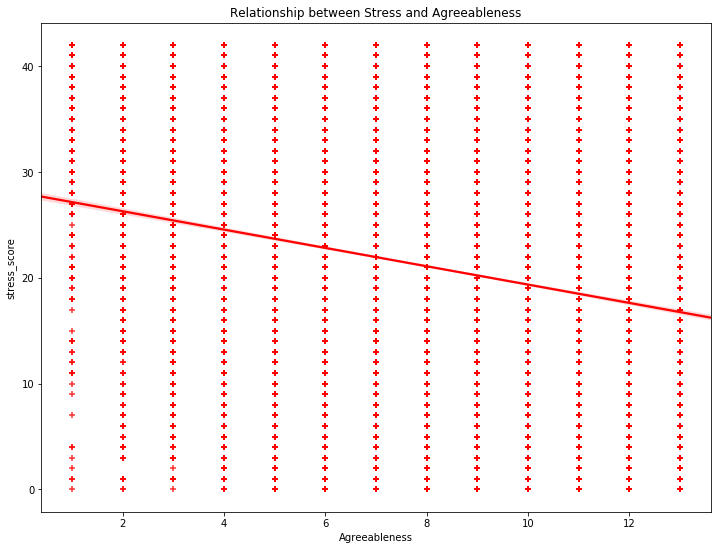

In [125]:
plt.figure(figsize = (12,9))
ax = sns.regplot(x='Agreeableness', y='stress_score',marker="+",color='r',data=data)
ax.set_title("Relationship between Stress and Agreeableness")

In [126]:
data.stress_score.corr(data.Agreeableness)

-0.1998999964625446

Text(0.5, 1.0, 'Relationship between Stress and Conscientiousness')

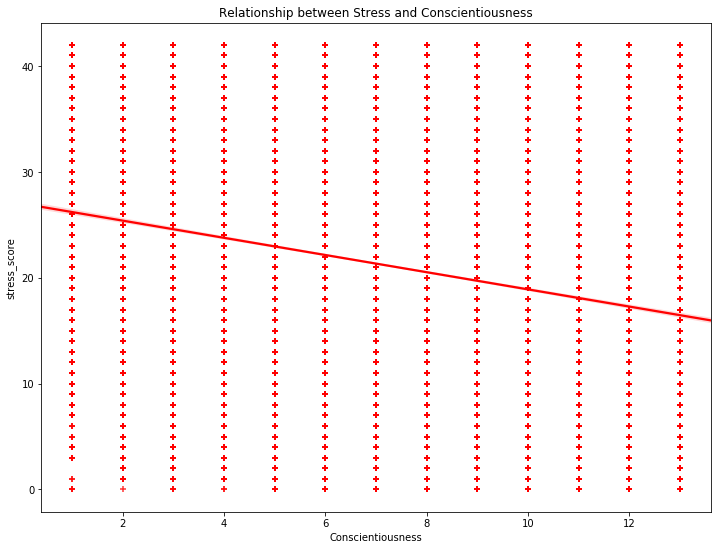

In [127]:
plt.figure(figsize = (12,9))
ax = sns.regplot(x='Conscientiousness', y='stress_score',marker="+",color='r',data=data)
ax.set_title("Relationship between Stress and Conscientiousness")

In [128]:
data.stress_score.corr(data.Conscientiousness)

-0.23012719928599798

Text(0.5, 1.0, 'Relationship between Stress and Emotional Stability')

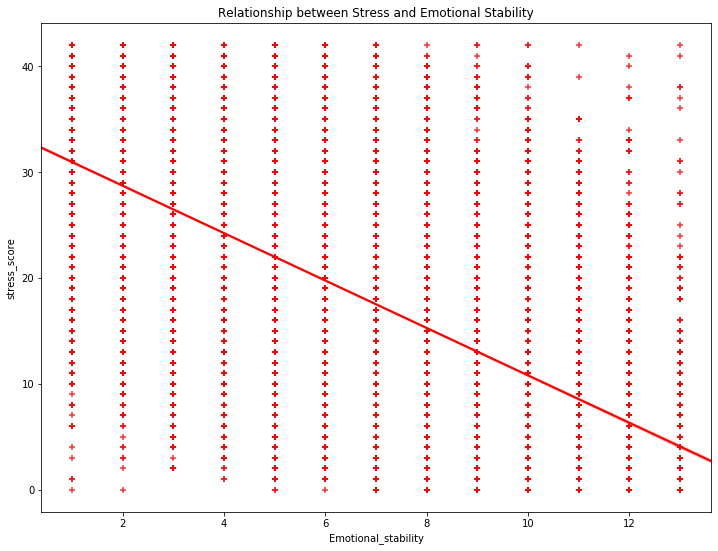

In [129]:
plt.figure(figsize = (12,9))
ax = sns.regplot(x='Emotional_stability', y='stress_score',marker="+",color='r',data=data)
ax.set_title("Relationship between Stress and Emotional Stability")

In [130]:
data.stress_score.corr(data.Emotional_stability)

-0.649979504101055

Text(0.5, 1.0, 'Relationship between Stress and Openness to Experience')

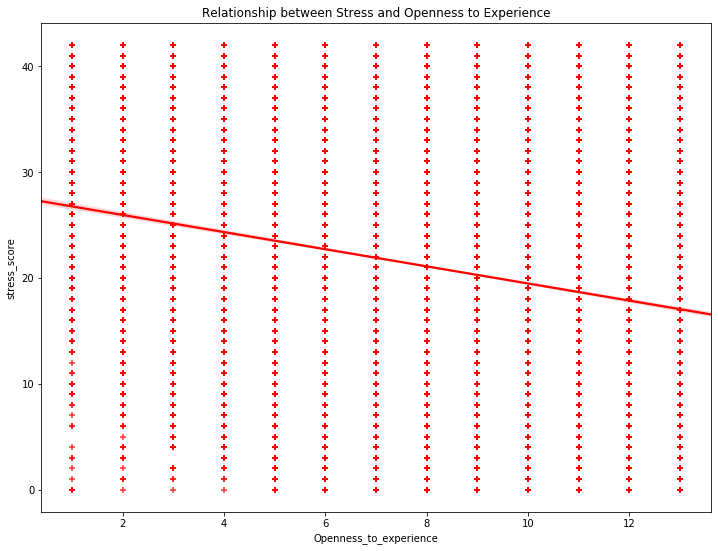

In [131]:
plt.figure(figsize = (12,9))
ax = sns.regplot(x='Openness_to_experience', y='stress_score',marker="+",color='r',data=data)
ax.set_title("Relationship between Stress and Openness to Experience")

In [132]:
data.stress_score.corr(data.Openness_to_experience)

-0.20523282690956401